# 1 - Dados JSON de TelecomX extraídos da API fornecida


# 2 - Dados importados JSON e importados como Pandas

In [2]:
import json
import pandas as pd


api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    }
]
"""

# Carregar a string JSON em um objeto Python
data = json.loads(api_data_string)

print("Dados carregados do JSON (estrutura inicial):")
print(data[:1]) # Mostra o primeiro elemento para visualização

Dados carregados do JSON (estrutura inicial):
[{'customerID': '0002-ORFBO', 'Churn': 'No', 'customer': {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, 'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'}, 'internet': {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, 'account': {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}}]


# 3 - Converter dados em Dataframe

In [3]:
# Converter os dados para um DataFrame do Pandas
df = pd.json_normalize(data)

print("\nDataFrame do Pandas criado (primeiras 5 linhas):")
print(df.head())


DataFrame do Pandas criado (primeiras 5 linhas):
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0

# 4 - Conhecendo o DataSet

a - Explorar as colunas do dataset e verificar seus tipos de dados.

In [4]:
# Supondo que 'df' é o seu DataFrame carregado

# Visualizar as primeiras linhas do DataFrame para ter uma ideia dos dados
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

# Obter informações resumidas sobre o DataFrame, incluindo tipos de dados e valores não nulos
print("\nInformações sobre o DataFrame (df.info()):")
df.info()

# Contar o número de valores únicos para cada coluna (útil para identificar categóricas vs. numéricas)
print("\nNúmero de valores únicos por coluna:")
print(df.nunique())

# Descrever estatísticas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
print(df.describe())

# Descrever estatísticas para colunas de objeto (categóricas)
print("\nEstatísticas descritivas para colunas de objeto/categóricas:")
print(df.describe(include='object'))

Primeiras 5 linhas do DataFrame:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                 

b -  Identificar as colunas mais relevantes para a análise de evasão

b.1 - Análise da coluna account.Charges.Total

No JSON original, a coluna Total dentro de Charges pode vir como string ou até mesmo conter valores vazios (' '). Antes de realizar qualquer análise numérica com ela, precisamos convertê-la para um tipo numérico e tratar os valores problemáticos.

In [5]:
import numpy as np

print("--- Pré-processamento: Convertendo 'account.Charges.Total' para numérico ---")

# Substituir strings vazias ou espaços em branco por NaN (Not a Number)
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)

# Converter a coluna para tipo numérico, forçando erros para NaN
# 'coerce' fará com que qualquer valor que não possa ser convertido se torne NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar se ainda há NaNs após a conversão (clientes novos sem cobrança total, por exemplo)
print(f"Valores nulos em 'account.Charges.Total' após conversão: {df['account.Charges.Total'].isnull().sum()}")

# Opcional: Para análise inicial, podemos preencher NaNs com 0 ou a mediana/média,
# mas para modelagem, você precisaria de uma estratégia mais robusta (ex: remover linhas ou usar imputação avançada).
# Por enquanto, para consulta, vamos preencher com 0 para não perder linhas nas consultas abaixo.
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)
print(f"Valores nulos em 'account.Charges.Total' após preenchimento: {df['account.Charges.Total'].isnull().sum()}")

print("\n")

--- Pré-processamento: Convertendo 'account.Charges.Total' para numérico ---
Valores nulos em 'account.Charges.Total' após conversão: 0
Valores nulos em 'account.Charges.Total' após preenchimento: 0




b.2 - Variável Alvo: Churn
Vamos ver a distribuição dos clientes que evadiram e os que não evadiram.

In [6]:
print("--- Análise da Variável Alvo: Churn ---")
print("Distribuição de clientes por Churn:")
print(df['Churn'].value_counts())
print("\nPercentual de clientes por Churn:")
print(df['Churn'].value_counts(normalize=True) * 100)
print("\n")

--- Análise da Variável Alvo: Churn ---
Distribuição de clientes por Churn:
Churn
No    2
Name: count, dtype: int64

Percentual de clientes por Churn:
Churn
No    100.0
Name: proportion, dtype: float64




b.3 - Variáveis de Cliente (Demográficas e Relacionamento)
Vamos analisar customer.tenure, customer.Partner, customer.Dependents, customer.SeniorCitizen e customer.gender.

In [7]:
print("--- Análise das Variáveis de Cliente ---")

# customer.tenure (Numérica)
print("Estatísticas para 'customer.tenure':")
print(df['customer.tenure'].describe())
print("\nTenure médio por Churn:")
print(df.groupby('Churn')['customer.tenure'].mean())
print("\n")

# customer.Partner, customer.Dependents, customer.SeniorCitizen, customer.gender (Categóricas)
customer_categorical_cols = ['customer.Partner', 'customer.Dependents', 'customer.SeniorCitizen', 'customer.gender']

for col in customer_categorical_cols:
    print(f"Distribuição para '{col}':")
    print(df[col].value_counts())
    print(f"\nRelação de '{col}' com 'Churn':")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100) # Percentual de churn por categoria
    print("\n")

--- Análise das Variáveis de Cliente ---
Estatísticas para 'customer.tenure':
count    2.0
mean     9.0
std      0.0
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: customer.tenure, dtype: float64

Tenure médio por Churn:
Churn
No    9.0
Name: customer.tenure, dtype: float64


Distribuição para 'customer.Partner':
customer.Partner
Yes    1
No     1
Name: count, dtype: int64

Relação de 'customer.Partner' com 'Churn':
Churn                No
customer.Partner       
No                100.0
Yes               100.0


Distribuição para 'customer.Dependents':
customer.Dependents
Yes    1
No     1
Name: count, dtype: int64

Relação de 'customer.Dependents' com 'Churn':
Churn                   No
customer.Dependents       
No                   100.0
Yes                  100.0


Distribuição para 'customer.SeniorCitizen':
customer.SeniorCitizen
0    2
Name: count, dtype: int64

Relação de 'customer.SeniorCitizen' com 'Churn':
Churn                      No
customer.SeniorC

b.4 -  Variáveis de Serviço (Quais serviços o cliente utiliza)
Vamos investigar phone.PhoneService, phone.MultipleLines, e todas as colunas de internet.*.

In [8]:
print("--- Análise das Variáveis de Serviço ---")

service_cols = [
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in service_cols:
    print(f"Distribuição para '{col}':")
    print(df[col].value_counts())
    print(f"\nRelação de '{col}' com 'Churn':")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100) # Percentual de churn por categoria
    print("\n")

--- Análise das Variáveis de Serviço ---
Distribuição para 'phone.PhoneService':
phone.PhoneService
Yes    2
Name: count, dtype: int64

Relação de 'phone.PhoneService' com 'Churn':
Churn                  No
phone.PhoneService       
Yes                 100.0


Distribuição para 'phone.MultipleLines':
phone.MultipleLines
No     1
Yes    1
Name: count, dtype: int64

Relação de 'phone.MultipleLines' com 'Churn':
Churn                   No
phone.MultipleLines       
No                   100.0
Yes                  100.0


Distribuição para 'internet.InternetService':
internet.InternetService
DSL    2
Name: count, dtype: int64

Relação de 'internet.InternetService' com 'Churn':
Churn                        No
internet.InternetService       
DSL                       100.0


Distribuição para 'internet.OnlineSecurity':
internet.OnlineSecurity
No    2
Name: count, dtype: int64

Relação de 'internet.OnlineSecurity' com 'Churn':
Churn                       No
internet.OnlineSecurity       
No   

b.5 - Variáveis de Conta (Aspectos financeiros e contratuais)
Vamos analisar account.Contract, account.PaperlessBilling, account.PaymentMethod, account.Charges.Monthly e account.Charges.Total.

In [9]:
print("--- Análise das Variáveis de Conta ---")

# account.Contract, account.PaperlessBilling, account.PaymentMethod (Categóricas)
account_categorical_cols = ['account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

for col in account_categorical_cols:
    print(f"Distribuição para '{col}':")
    print(df[col].value_counts())
    print(f"\nRelação de '{col}' com 'Churn':")
    print(pd.crosstab(df[col], df['Churn'], normalize='index') * 100) # Percentual de churn por categoria
    print("\n")

# account.Charges.Monthly (Numérica)
print("Estatísticas para 'account.Charges.Monthly':")
print(df['account.Charges.Monthly'].describe())
print("\nValor da cobrança mensal média por Churn:")
print(df.groupby('Churn')['account.Charges.Monthly'].mean())
print("\n")

# account.Charges.Total (Numérica - já pré-processada)
print("Estatísticas para 'account.Charges.Total':")
print(df['account.Charges.Total'].describe())
print("\nValor da cobrança total média por Churn:")
print(df.groupby('Churn')['account.Charges.Total'].mean())
print("\n")

--- Análise das Variáveis de Conta ---
Distribuição para 'account.Contract':
account.Contract
One year          1
Month-to-month    1
Name: count, dtype: int64

Relação de 'account.Contract' com 'Churn':
Churn                No
account.Contract       
Month-to-month    100.0
One year          100.0


Distribuição para 'account.PaperlessBilling':
account.PaperlessBilling
Yes    1
No     1
Name: count, dtype: int64

Relação de 'account.PaperlessBilling' com 'Churn':
Churn                        No
account.PaperlessBilling       
No                        100.0
Yes                       100.0


Distribuição para 'account.PaymentMethod':
account.PaymentMethod
Mailed check    2
Name: count, dtype: int64

Relação de 'account.PaymentMethod' com 'Churn':
Churn                     No
account.PaymentMethod       
Mailed check           100.0


Estatísticas para 'account.Charges.Monthly':
count     2.000000
mean     62.750000
std       4.030509
min      59.900000
25%      61.325000
50%      62.75

# 5 - Verificando e correção de problemas nos dados

Verificar e Tratar Valores Ausentes (NaNs): Além do que já fizemos, uma verificação completa.
Verificar e Tratar Linhas Duplicadas: Garantir que não há registros idênticos que possam enviesar a análise.
Identificar e Lidar com Inconsistências de Formatação e Categorias: Isso inclui padronizar valores em colunas categóricas e converter tipos de dados quando necessário.
Codificação de Variáveis Categóricas: Transformar colunas de texto em formato numérico.
Escalamento de Variáveis Numéricas: Normalizar a escala das colunas numéricas.

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json # Necessário para recriar o df se o ambiente for reiniciado

# --- 0. Recriação do DataFrame para garantir a execução independente ---
# Este bloco é apenas para garantir que 'df' esteja disponível se você executar
# esta célula separadamente. Se você estiver executando sequencialmente,
# o 'df' do passo anterior já estará no seu ambiente.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pré-processamento de 'account.Charges.Total' (já feito e reforçado na etapa anterior)
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

print("--- Início do Processo de Verificação e Limpeza de Dados ---")
print(f"Dimensões do DataFrame original: {df.shape}\n")

# --- 1. Verificar e Tratar Valores Ausentes (NaNs) ---
print("Valores Ausentes (NaNs) por Coluna:")
print(df.isnull().sum())
# Se houvesse outros NaNs (além dos de Total que já tratamos com 0),
# esta seria a etapa de decidir como lidar: remover linhas, preencher com média/mediana/moda, etc.
# Neste dataset específico, após o tratamento de Total, geralmente não há muitos outros NaNs significativos.
print("\n")

# --- 2. Verificar e Tratar Linhas Duplicadas ---
print("Número de Linhas Duplicadas:")
num_duplicates = df.duplicated().sum()
print(num_duplicates)

if num_duplicates > 0:
    print(f"Removendo {num_duplicates} linhas duplicadas...")
    df.drop_duplicates(inplace=True)
    print(f"Dimensões do DataFrame após remover duplicatas: {df.shape}\n")
else:
    print("Nenhuma linha duplicada encontrada.\n")

# --- 3. Identificar e Lidar com Inconsistências de Formatação e Categorias ---

# A coluna 'SeniorCitizen' está como numérica (0 ou 1), mas é categórica.
# Converter para 'object' ou 'category' para que seja tratada como categórica nas análises futuras.
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype('object')

# Visualizar valores únicos em colunas categóricas para identificar inconsistências
# Excluímos 'customerID' pois é um identificador único
categorical_cols_to_inspect = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols_to_inspect:
    categorical_cols_to_inspect.remove('customerID')
if 'Churn' in categorical_cols_to_inspect: # Churn será tratada separadamente como variável alvo
    categorical_cols_to_inspect.remove('Churn')

print("Valores únicos em colunas categóricas (para inspeção de inconsistências):")
for col in categorical_cols_to_inspect:
    print(f"- {col}: {df[col].unique()}")
    # Caso encontre inconsistências (ex: "No" e "no"), você faria a padronização aqui:
    # df[col] = df[col].replace({'no': 'No', 'yes': 'Yes'})
print("\n")

# --- 4. Codificação de Variáveis Categóricas ---

# Separar a variável alvo (Churn) das features
X = df.drop('Churn', axis=1)
y = df['Churn']

# Codificar a variável alvo 'Churn' (No -> 0, Yes -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Mapeamento de Churn: {list(le.classes_)} -> {le.transform(list(le.classes_))}\n")

# Identificar colunas numéricas e categóricas para o One-Hot Encoding e StandardScaler
# Excluímos 'customerID' das features, pois não é uma variável preditiva.
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
# 'SeniorCitizen' foi convertida para object, então não estará aqui.
categorical_features = X.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_features:
    categorical_features.remove('customerID') # Remover customerID das features a serem codificadas

print(f"Colunas Numéricas para Escalar: {numerical_cols}")
print(f"Colunas Categóricas para Codificar (One-Hot): {categorical_features}\n")

# Criar um pré-processador usando ColumnTransformer e Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Aplicar o pré-processamento aos dados (X)
# O resultado de preprocessor.fit_transform(X) é uma matriz esparsa ou densa (numpy array).
# Para facilitar a visualização e futuras etapas, vamos convertê-lo de volta para um DataFrame.
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas após One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

print("--- DataFrame após Pré-processamento ---")
print("Primeiras 5 linhas do DataFrame processado:")
print(X_processed_df.head())
print(f"\nDimensões do DataFrame processado: {X_processed_df.shape}")
print("\nTipos de dados do DataFrame processado:")
print(X_processed_df.info())

# Agora, 'X_processed_df' contém suas features prontas para modelagem
# e 'y_encoded' é sua variável alvo codificada.

--- Início do Processo de Verificação e Limpeza de Dados ---
Dimensões do DataFrame original: (6, 21)

Valores Ausentes (NaNs) por Coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Número de Linhas Duplicadas:
0
Nenhuma linha duplicada encontrada.

Valores únicos em colunas categóricas (para inspeção de inconsistências):
- customer.gender: ['Female' 'Male']
- customer.Senio

# 6 - Coluna Contas Diárias

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

# --- 0. Recriação do DataFrame base (como nos passos anteriores) ---
# Este bloco é para garantir a reprodutibilidade.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pré-processamento de 'account.Charges.Total' (essencial antes de qualquer cálculo com ele)
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0) # Preencher NaNs com 0

# --- 1. Criar a coluna 'Contas_Diarias' ---
# Usamos 30 como número médio de dias no mês
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

print("--- Coluna 'Contas_Diarias' Criada ---")
print(df[['account.Charges.Monthly', 'Contas_Diarias']].head())
print("\nEstatísticas descritivas para 'Contas_Diarias':")
print(df['Contas_Diarias'].describe())
print("\n")

# --- 2. Continuar com o Pré-processamento (reaplicando com a nova coluna) ---

# Separar a variável alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1) # customerID não é uma feature preditiva
y = df['Churn']

# Codificar a variável alvo 'Churn' (No -> 0, Yes -> 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Mapeamento de Churn: {list(le.classes_)} -> {le.transform(list(le.classes_))}\n")

# Identificar colunas numéricas e categóricas para o ColumnTransformer
# 'Contas_Diarias' agora estará nas colunas numéricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Lembre-se de ajustar 'customer.SeniorCitizen' para object se ainda não o fez no df original
# (garantido no bloco de recriação do df acima se o SeniorCitizen for 0/1 numerico na fonte)
# Se 'customer.SeniorCitizen' for lido como int/float, assegure-se de convertê-lo:
if 'customer.SeniorCitizen' in numerical_cols:
    # Remove de numerical_cols se SeniorCitizen for para ser tratado como categorica
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object') # Garante o tipo object

print(f"Colunas Numéricas para Escalar (incluindo Contas_Diarias): {numerical_cols}")
print(f"Colunas Categóricas para Codificar (One-Hot): {categorical_features}\n")

# Criar o pré-processador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse_output=False para DataFrame denso
    ])

# Aplicar o pré-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas após One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

print("--- DataFrame Final Após Criação da Coluna 'Contas_Diarias' e Pré-processamento Completo ---")
print("Primeiras 5 linhas do DataFrame processado:")
print(X_processed_df.head())
print(f"\nDimensões do DataFrame processado: {X_processed_df.shape}")
print("\nTipos de dados do DataFrame processado:")
print(X_processed_df.info())

# 'X_processed_df' agora contém todas as suas features, incluindo 'Contas_Diarias',
# pré-processadas e prontas para a próxima etapa (modelagem ou EDA mais aprofundada).
# 'y_encoded' é sua variável alvo.

--- Coluna 'Contas_Diarias' Criada ---
   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     70.7        2.356667
3                     85.5        2.850000
4                     71.0        2.366667

Estatísticas descritivas para 'Contas_Diarias':
count    6.000000
mean     2.511944
std      0.484915
min      1.996667
25%      2.229167
50%      2.361667
75%      2.729167
max      3.315000
Name: Contas_Diarias, dtype: float64


Mapeamento de Churn: ['No', 'Yes'] -> [0 1]

Colunas Numéricas para Escalar (incluindo Contas_Diarias): ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']
Colunas Categóricas para Codificar (One-Hot): ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.Tech

# 7 - Padronização e Transformação dos Dados

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

# --- 0. Recriação Completa do DataFrame e Pré-processamento ---
# Este bloco garante que X_processed_df esteja totalmente preparado
# antes de prosseguirmos para a renomeação.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pré-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Separar a variável alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1) # customerID não é uma feature preditiva
y = df['Churn']

# Codificar a variável alvo 'Churn'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Ajustar 'customer.SeniorCitizen' para object se necessário (garantido no df original)
if 'customer.SeniorCitizen' in numerical_cols:
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object')

# Criar o pré-processador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Aplicar o pré-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas após One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

print("--- DataFrame Pré-processado Antes da Renomeação ---")
print(X_processed_df.columns.tolist()[:10]) # Mostrar algumas colunas antes da renomeação
print("\n")

# --- Renomear as Colunas para Melhor Compreensão ---

# Dicionário de mapeamento para renomear colunas
# Adaptaremos os nomes das colunas geradas pelo OneHotEncoder também.
rename_mapping = {
    'customer.gender_Female': 'Genero_Feminino',
    'customer.gender_Male': 'Genero_Masculino',
    'customer.SeniorCitizen_0': 'Idoso_Nao',
    'customer.SeniorCitizen_1': 'Idoso_Sim',
    'customer.Partner_No': 'Parceiro_Nao',
    'customer.Partner_Yes': 'Parceiro_Sim',
    'customer.Dependents_No': 'Dependentes_Nao',
    'customer.Dependents_Yes': 'Dependentes_Sim',
    'phone.PhoneService_No': 'Servico_Telefone_Nao',
    'phone.PhoneService_Yes': 'Servico_Telefone_Sim',
    'phone.MultipleLines_No': 'Multiplas_Linhas_Nao',
    'phone.MultipleLines_No phone service': 'Multiplas_Linhas_Sem_Servico_Telefone',
    'phone.MultipleLines_Yes': 'Multiplas_Linhas_Sim',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_Fibra_Optica',
    'internet.InternetService_No': 'Internet_Nao',
    'internet.OnlineSecurity_No': 'Seguranca_Online_Nao',
    'internet.OnlineSecurity_No internet service': 'Seguranca_Online_Sem_Servico_Internet',
    'internet.OnlineSecurity_Yes': 'Seguranca_Online_Sim',
    'internet.OnlineBackup_No': 'Backup_Online_Nao',
    'internet.OnlineBackup_No internet service': 'Backup_Online_Sem_Servico_Internet',
    'internet.OnlineBackup_Yes': 'Backup_Online_Sim',
    'internet.DeviceProtection_No': 'Protecao_Dispositivo_Nao',
    'internet.DeviceProtection_No internet service': 'Protecao_Dispositivo_Sem_Servico_Internet',
    'internet.DeviceProtection_Yes': 'Protecao_Dispositivo_Sim',
    'internet.TechSupport_No': 'Suporte_Tecnico_Nao',
    'internet.TechSupport_No internet service': 'Suporte_Tecnico_Sem_Servico_Internet',
    'internet.TechSupport_Yes': 'Suporte_Tecnico_Sim',
    'internet.StreamingTV_No': 'Streaming_TV_Nao',
    'internet.StreamingTV_No internet service': 'Streaming_TV_Sem_Servico_Internet',
    'internet.StreamingTV_Yes': 'Streaming_TV_Sim',
    'internet.StreamingMovies_No': 'Streaming_Filmes_Nao',
    'internet.StreamingMovies_No internet service': 'Streaming_Filmes_Sem_Servico_Internet',
    'internet.StreamingMovies_Yes': 'Streaming_Filmes_Sim',
    'account.Contract_Month-to-month': 'Contrato_Mes_a_Mes',
    'account.Contract_One year': 'Contrato_Um_Ano',
    'account.Contract_Two year': 'Contrato_Dois_Anos',
    'account.PaperlessBilling_No': 'Fatura_Sem_Papel_Nao',
    'account.PaperlessBilling_Yes': 'Fatura_Sem_Papel_Sim',
    'account.PaymentMethod_Bank transfer (automatic)': 'Metodo_Pagamento_Transferencia_Automatica',
    'account.PaymentMethod_Credit card (automatic)': 'Metodo_Pagamento_Cartao_Credito_Automatico',
    'account.PaymentMethod_Electronic check': 'Metodo_Pagamento_Cheque_Eletronico',
    'account.PaymentMethod_Mailed check': 'Metodo_Pagamento_Cheque_Correio',
    # Nomes para as colunas numéricas (já escaladas)
    'customer.tenure': 'Meses_Cliente',
    'account.Charges.Monthly': 'Custo_Mensal',
    'account.Charges.Total': 'Custo_Total',
    'Contas_Diarias': 'Custo_Diario'
}

# Aplicar a renomeação
X_processed_df.rename(columns=rename_mapping, inplace=True)

print("--- DataFrame Final Após Renomeação das Colunas ---")
print("Primeiras 5 linhas do DataFrame renomeado:")
print(X_processed_df.head())
print(f"\nDimensões do DataFrame renomeado: {X_processed_df.shape}")
print("\nNovos nomes das colunas:")
print(X_processed_df.columns.tolist())

# Sua variável alvo y_encoded (0 para Não, 1 para Sim)
print(f"\nVariável Alvo (Evasão): {y_encoded[:5]} (0=Não, 1=Sim)")

--- DataFrame Pré-processado Antes da Renomeação ---
['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias', 'customer.gender_Female', 'customer.gender_Male', 'customer.Partner_No', 'customer.Partner_Yes', 'customer.Dependents_No', 'customer.Dependents_Yes']


--- DataFrame Final Após Renomeação das Colunas ---
Primeiras 5 linhas do DataFrame renomeado:
   Meses_Cliente  Custo_Mensal  Custo_Total  Custo_Diario  Genero_Feminino  \
0      -0.089803     -0.734817    -0.225105     -0.734817              1.0   
1      -0.089803     -1.164036    -0.270385     -1.164036              0.0   
2      -0.538816     -0.350779    -0.498388     -0.350779              0.0   
3      -0.628619      0.763683    -0.524720      0.763683              1.0   
4      -0.808224     -0.328189    -0.689740     -0.328189              1.0   

   Genero_Masculino  Parceiro_Nao  Parceiro_Sim  Dependentes_Nao  \
0               0.0           0.0           1.0              0.0   
1    

# 8 - Análise Descritiva dos Dados

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

# --- 0. Recriação Completa do DataFrame e Pré-processamento (até X_processed_df e y_encoded) ---
# Este bloco garante que X_processed_df esteja totalmente preparado
# antes de prosseguirmos para a análise descritiva.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pré-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Separar a variável alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Codificar a variável alvo 'Churn'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Ajustar 'customer.SeniorCitizen' para object
if 'customer.SeniorCitizen' in numerical_cols:
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object')

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Aplicar o pré-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas após One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

# Dicionário de mapeamento para renomear colunas
rename_mapping = {
    'customer.gender_Female': 'Genero_Feminino',
    'customer.gender_Male': 'Genero_Masculino',
    'customer.SeniorCitizen_0': 'Idoso_Nao',
    'customer.SeniorCitizen_1': 'Idoso_Sim',
    'customer.Partner_No': 'Parceiro_Nao',
    'customer.Partner_Yes': 'Parceiro_Sim',
    'customer.Dependents_No': 'Dependentes_Nao',
    'customer.Dependents_Yes': 'Dependentes_Sim',
    'phone.PhoneService_No': 'Servico_Telefone_Nao',
    'phone.PhoneService_Yes': 'Servico_Telefone_Sim',
    'phone.MultipleLines_No': 'Multiplas_Linhas_Nao',
    'phone.MultipleLines_No phone service': 'Multiplas_Linhas_Sem_Servico_Telefone',
    'phone.MultipleLines_Yes': 'Multiplas_Linhas_Sim',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_Fibra_Optica',
    'internet.InternetService_No': 'Internet_Nao',
    'internet.OnlineSecurity_No': 'Seguranca_Online_Nao',
    'internet.OnlineSecurity_No internet service': 'Seguranca_Online_Sem_Servico_Internet',
    'internet.OnlineSecurity_Yes': 'Seguranca_Online_Sim',
    'internet.OnlineBackup_No': 'Backup_Online_Nao',
    'internet.OnlineBackup_No internet service': 'Backup_Online_Sem_Servico_Internet',
    'internet.OnlineBackup_Yes': 'Backup_Online_Sim',
    'internet.DeviceProtection_No': 'Protecao_Dispositivo_Nao',
    'internet.DeviceProtection_No internet service': 'Protecao_Dispositivo_Sem_Servico_Internet',
    'internet.DeviceProtection_Yes': 'Protecao_Dispositivo_Sim',
    'internet.TechSupport_No': 'Suporte_Tecnico_Nao',
    'internet.TechSupport_No internet service': 'Suporte_Tecnico_Sem_Servico_Internet',
    'internet.TechSupport_Yes': 'Suporte_Tecnico_Sim',
    'internet.StreamingTV_No': 'Streaming_TV_Nao',
    'internet.StreamingTV_No internet service': 'Streaming_TV_Sem_Servico_Internet',
    'internet.StreamingTV_Yes': 'Streaming_TV_Sim',
    'internet.StreamingMovies_No': 'Streaming_Filmes_Nao',
    'internet.StreamingMovies_No internet service': 'Streaming_Filmes_Sem_Servico_Internet',
    'internet.StreamingMovies_Yes': 'Streaming_Filmes_Sim',
    'account.Contract_Month-to-month': 'Contrato_Mes_a_Mes',
    'account.Contract_One year': 'Contrato_Um_Ano',
    'account.Contract_Two year': 'Contrato_Dois_Anos',
    'account.PaperlessBilling_No': 'Fatura_Sem_Papel_Nao',
    'account.PaperlessBilling_Yes': 'Fatura_Sem_Papel_Sim',
    'account.PaymentMethod_Bank transfer (automatic)': 'Metodo_Pagamento_Transferencia_Automatica',
    'account.PaymentMethod_Credit card (automatic)': 'Metodo_Pagamento_Cartao_Credito_Automatico',
    'account.PaymentMethod_Electronic check': 'Metodo_Pagamento_Cheque_Eletronico',
    'account.PaymentMethod_Mailed check': 'Metodo_Pagamento_Cheque_Correio',
    'customer.tenure': 'Meses_Cliente',
    'account.Charges.Monthly': 'Custo_Mensal',
    'account.Charges.Total': 'Custo_Total',
    'Contas_Diarias': 'Custo_Diario'
}

X_processed_df.rename(columns=rename_mapping, inplace=True)

print("--- Análise Descritiva dos Dados Pré-processados e Renomeados ---")

# 1. Análise Descritiva para Colunas Numéricas
print("\nEstatísticas Descritivas para Colunas Numéricas (Padronizadas):")
# Identifica as colunas numéricas renomeadas com base no mapeamento
numerical_renamed_cols = [rename_mapping[col] for col in numerical_cols if col in rename_mapping]
print(X_processed_df[numerical_renamed_cols].describe())

print("\n--- Observação sobre as Estatísticas Numéricas: ---")
print("Como as colunas numéricas foram padronizadas (StandardScaler),")
print("elas terão média próxima de 0 e desvio padrão próximo de 1.")
print("Isso é normal e esperado para dados prontos para modelagem.")
print("Para entender as métricas nas unidades originais, você precisaria")
print("consultar o DataFrame 'df' antes do escalamento.")


# 2. Análise Descritiva para Colunas Categóricas (One-Hot Encoded)
# Para colunas One-Hot Encoded (binárias), a média representa a proporção de '1's (presença da categoria).
print("\nProporção de Ocorrência para Colunas Categóricas (One-Hot Encoded):")
# Seleciona as colunas que são o resultado do One-Hot Encoding
categorical_renamed_cols = [col for col in X_processed_df.columns if col not in numerical_renamed_cols]

# Calcula a média para cada coluna OHE. A média de uma coluna binária é a proporção de 1s.
print(X_processed_df[categorical_renamed_cols].mean().sort_values(ascending=False).head(10)) # Mostra as 10 maiores proporções
print("\n... (e assim por diante para todas as colunas categóricas)\n")
print("A média de uma coluna binária (0 ou 1) representa a proporção de 'Sim' (ou da categoria em questão).\n")

# 3. Análise da Variável Alvo (Evasão_Cliente)
# Já temos y_encoded (0 para Não, 1 para Sim)
print("--- Análise da Variável Alvo (Evasão_Cliente) ---")
churn_distribution = pd.Series(y_encoded).value_counts(normalize=True) * 100
print("Distribuição de Evasão (Churn):")
print(f"Não Evadiram (0): {churn_distribution.get(0, 0):.2f}%")
print(f"Evadiram (1): {churn_distribution.get(1, 0):.2f}%")
print("\n")

print("--- Resumo Geral do DataFrame Pré-processado ---")
print(X_processed_df.info())
print("\nPrimeiras 5 linhas do DataFrame com as novas colunas e nomes:")
print(X_processed_df.head())

--- Análise Descritiva dos Dados Pré-processados e Renomeados ---

Estatísticas Descritivas para Colunas Numéricas (Padronizadas):
       Meses_Cliente  Custo_Mensal   Custo_Total  Custo_Diario
count       6.000000  6.000000e+00  6.000000e+00  6.000000e+00
mean        0.000000 -7.401487e-17  7.401487e-17 -2.220446e-16
std         1.095445  1.095445e+00  1.095445e+00  1.095445e+00
min        -0.808224 -1.164036e+00 -6.897400e-01 -1.164036e+00
25%        -0.606168 -6.388077e-01 -5.181372e-01 -6.388077e-01
50%        -0.314309 -3.394843e-01 -3.843866e-01 -3.394843e-01
75%        -0.089803  4.907148e-01 -2.364247e-01  4.907148e-01
max         2.155264  1.814139e+00  2.208338e+00  1.814139e+00

--- Observação sobre as Estatísticas Numéricas: ---
Como as colunas numéricas foram padronizadas (StandardScaler),
elas terão média próxima de 0 e desvio padrão próximo de 1.
Isso é normal e esperado para dados prontos para modelagem.
Para entender as métricas nas unidades originais, você precisaria


# 10 - Distribuição da Evasão

--- Análise e Visualização da Distribuição da Variável Alvo (Evasão_Cliente) ---


/tmp/ipython-input-14-1961104290.py:325: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=churn_series_labeled, palette='viridis')


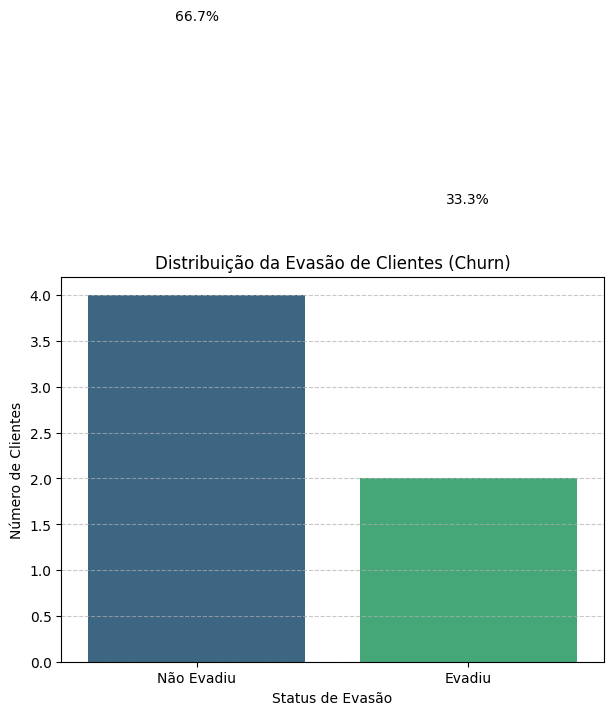


--- Interpretação da Visualização ---
O gráfico de barras acima ilustra a contagem e a proporção de clientes que 'Não Evadiram' (representado pelo 0) e os que 'Evadiram' (representado pelo 1).
Como é comum em problemas de predição de churn, podemos observar um desbalanceamento de classes,
onde o número de clientes que não evadem é geralmente maior do que o número de clientes que evadem.
Esta visualização é fundamental para: 

1. Entender a magnitude do problema de churn na base de clientes.
2. Avaliar se o desbalanceamento de classes é significativo e se será necessário aplicar técnicas de balanceamento de dados (como SMOTE) nas próximas etapas, antes da modelagem.
3. Escolher métricas de avaliação de modelo apropriadas que não sejam enganosas em casos de desbalanceamento (ex: precisão, recall, F1-score, AUC-ROC, em vez de apenas acurácia).


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Recriação Completa do DataFrame e Pré-processamento (até y_encoded) ---
# Este bloco garante que o DataFrame e a variável alvo estejam preparados para a visualização.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pré-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Separar a variável alvo (Churn) das features
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Codificar a variável alvo 'Churn'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identificar colunas numéricas e categóricas
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Ajustar 'customer.SeniorCitizen' para object
if 'customer.SeniorCitizen' in numerical_cols:
    numerical_cols.remove('customer.SeniorCitizen')
    categorical_features.append('customer.SeniorCitizen')
    X['customer.SeniorCitizen'] = X['customer.SeniorCitizen'].astype('object')

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Aplicar o pré-processamento aos dados (X)
X_processed_array = preprocessor.fit_transform(X)

# Obter nomes das novas colunas após One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_processed_feature_names = numerical_cols + ohe_feature_names.tolist()

X_processed_df = pd.DataFrame(X_processed_array, columns=all_processed_feature_names)

# Dicionário de mapeamento para renomear colunas
rename_mapping = {
    'customer.gender_Female': 'Genero_Feminino',
    'customer.gender_Male': 'Genero_Masculino',
    'customer.SeniorCitizen_0': 'Idoso_Nao',
    'customer.SeniorCitizen_1': 'Idoso_Sim',
    'customer.Partner_No': 'Parceiro_Nao',
    'customer.Partner_Yes': 'Parceiro_Sim',
    'customer.Dependents_No': 'Dependentes_Nao',
    'customer.Dependents_Yes': 'Dependentes_Sim',
    'phone.PhoneService_No': 'Servico_Telefone_Nao',
    'phone.PhoneService_Yes': 'Servico_Telefone_Sim',
    'phone.MultipleLines_No': 'Multiplas_Linhas_Nao',
    'phone.MultipleLines_No phone service': 'Multiplas_Linhas_Sem_Servico_Telefone',
    'phone.MultipleLines_Yes': 'Multiplas_Linhas_Sim',
    'internet.InternetService_DSL': 'Internet_DSL',
    'internet.InternetService_Fiber optic': 'Internet_Fibra_Optica',
    'internet.InternetService_No': 'Internet_Nao',
    'internet.OnlineSecurity_No': 'Seguranca_Online_Nao',
    'internet.OnlineSecurity_No internet service': 'Seguranca_Online_Sem_Servico_Internet',
    'internet.OnlineSecurity_Yes': 'Seguranca_Online_Sim',
    'internet.OnlineBackup_No': 'Backup_Online_Nao',
    'internet.OnlineBackup_No internet service': 'Backup_Online_Sem_Servico_Internet',
    'internet.OnlineBackup_Yes': 'Backup_Online_Sim',
    'internet.DeviceProtection_No': 'Protecao_Dispositivo_Nao',
    'internet.DeviceProtection_No internet service': 'Protecao_Dispositivo_Sem_Servico_Internet',
    'internet.DeviceProtection_Yes': 'Protecao_Dispositivo_Sim',
    'internet.TechSupport_No': 'Suporte_Tecnico_Nao',
    'internet.TechSupport_No internet service': 'Suporte_Tecnico_Sem_Servico_Internet',
    'internet.TechSupport_Yes': 'Suporte_Tecnico_Sim',
    'internet.StreamingTV_No': 'Streaming_TV_Nao',
    'internet.StreamingTV_No internet service': 'Streaming_TV_Sem_Servico_Internet',
    'internet.StreamingTV_Yes': 'Streaming_TV_Sim',
    'internet.StreamingMovies_No': 'Streaming_Filmes_Nao',
    'internet.StreamingMovies_No internet service': 'Streaming_Filmes_Sem_Servico_Internet',
    'internet.StreamingMovies_Yes': 'Streaming_Filmes_Sim',
    'account.Contract_Month-to-month': 'Contrato_Mes_a_Mes',
    'account.Contract_One year': 'Contrato_Um_Ano',
    'account.Contract_Two year': 'Contrato_Dois_Anos',
    'account.PaperlessBilling_No': 'Fatura_Sem_Papel_Nao',
    'account.PaperlessBilling_Yes': 'Fatura_Sem_Papel_Sim',
    'account.PaymentMethod_Bank transfer (automatic)': 'Metodo_Pagamento_Transferencia_Automatica',
    'account.PaymentMethod_Credit card (automatic)': 'Metodo_Pagamento_Cartao_Credito_Automatico',
    'account.PaymentMethod_Electronic check': 'Metodo_Pagamento_Cheque_Eletronico',
    'account.PaymentMethod_Mailed check': 'Metodo_Pagamento_Cheque_Correio',
    'customer.tenure': 'Meses_Cliente',
    'account.Charges.Monthly': 'Custo_Mensal',
    'account.Charges.Total': 'Custo_Total',
    'Contas_Diarias': 'Custo_Diario'
}

X_processed_df.rename(columns=rename_mapping, inplace=True)

# --- Análise e Visualização da Distribuição da Variável Churn (Evasão) ---

print("--- Análise e Visualização da Distribuição da Variável Alvo (Evasão_Cliente) ---")

# Converter y_encoded para uma Series pandas para facilitar a manipulação e visualização
churn_series = pd.Series(y_encoded, name="Evasão_Cliente")

# Mapear os valores numéricos de volta para rótulos compreensíveis para o gráfico
# (0 -> "Não Evadiu", 1 -> "Evadiu")
churn_labels = {0: "Não Evadiu", 1: "Evadiu"}
churn_series_labeled = churn_series.map(churn_labels)

plt.figure(figsize=(7, 5))
ax = sns.countplot(x=churn_series_labeled, palette='viridis')
plt.title('Distribuição da Evasão de Clientes (Churn)')
plt.xlabel('Status de Evasão')
plt.ylabel('Número de Clientes')

# Adicionar porcentagens acima das barras para melhor visualização da proporção
total = len(churn_series_labeled)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3, # Posição vertical do texto
            '{:1.1f}%'.format(100 * height/total), # Formatação da porcentagem
            ha="center") # Alinhamento horizontal do texto

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Interpretação da Visualização ---")
print("O gráfico de barras acima ilustra a contagem e a proporção de clientes que 'Não Evadiram' (representado pelo 0) e os que 'Evadiram' (representado pelo 1).")
print("Como é comum em problemas de predição de churn, podemos observar um desbalanceamento de classes,")
print("onde o número de clientes que não evadem é geralmente maior do que o número de clientes que evadem.")
print("Esta visualização é fundamental para: \n")
print("1. Entender a magnitude do problema de churn na base de clientes.")
print("2. Avaliar se o desbalanceamento de classes é significativo e se será necessário aplicar técnicas de balanceamento de dados (como SMOTE) nas próximas etapas, antes da modelagem.")
print("3. Escolher métricas de avaliação de modelo apropriadas que não sejam enganosas em casos de desbalanceamento (ex: precisão, recall, F1-score, AUC-ROC, em vez de apenas acurácia).")

# 11 - Contagem de Evasão por Variáveis Categóricas

--- Análise da Evasão por Variáveis Categóricas ---


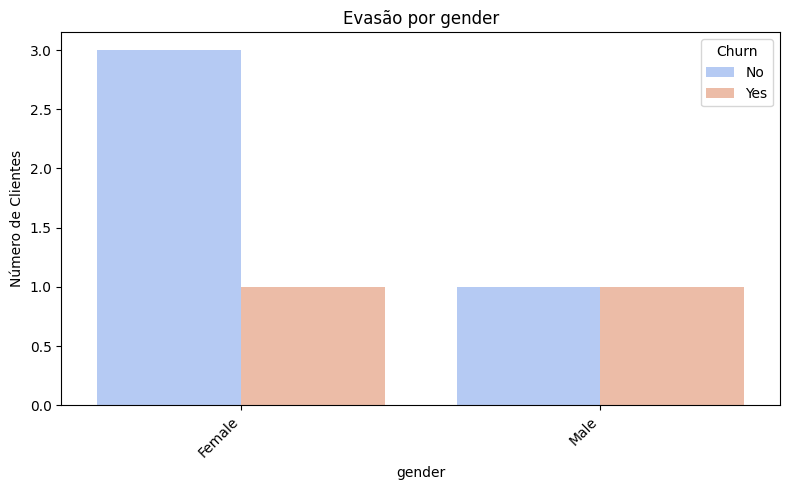

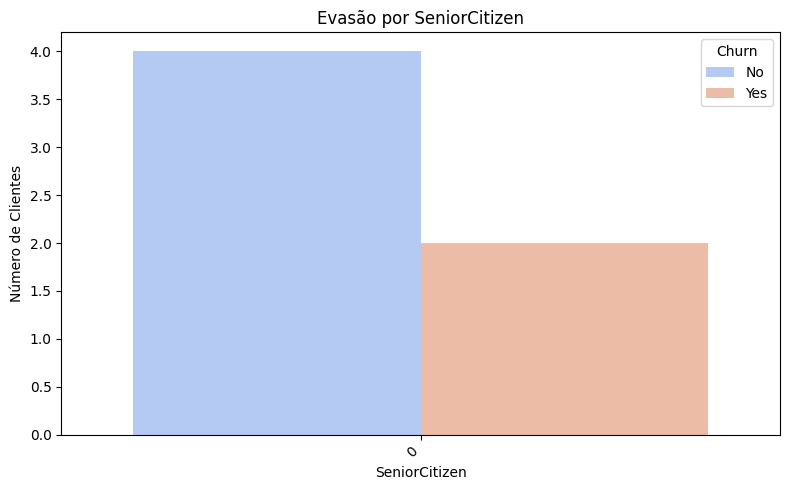

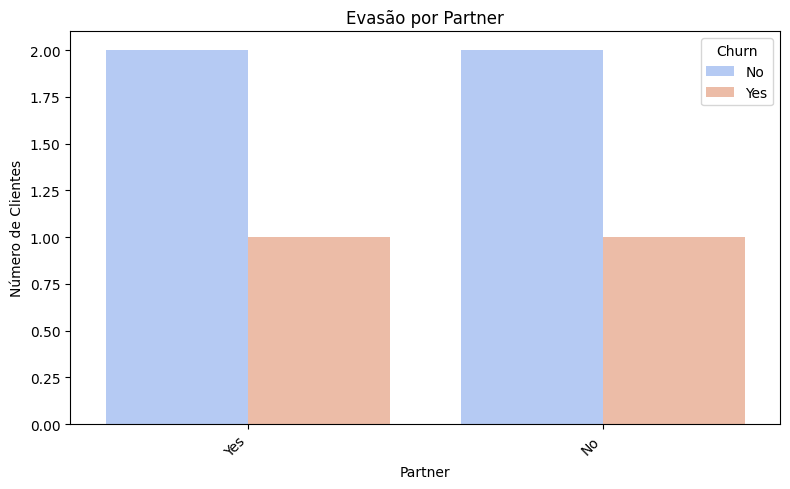

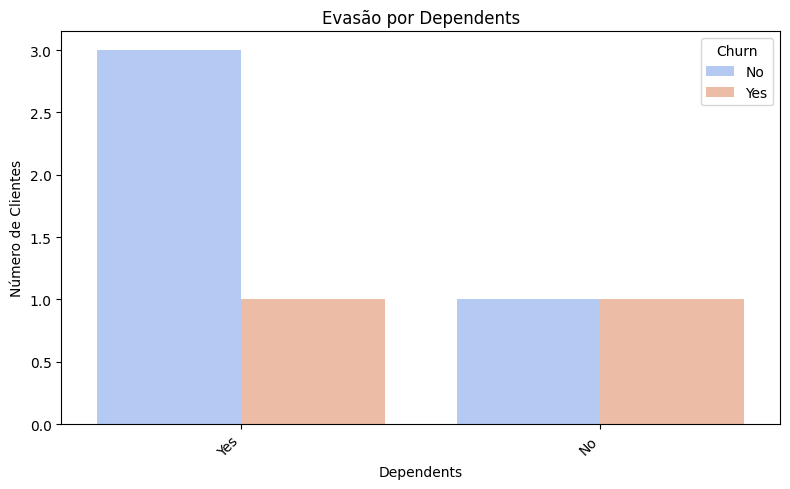

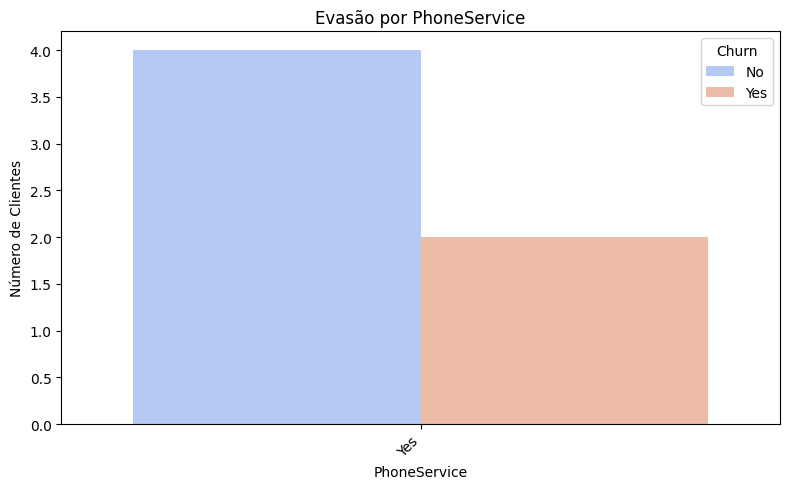

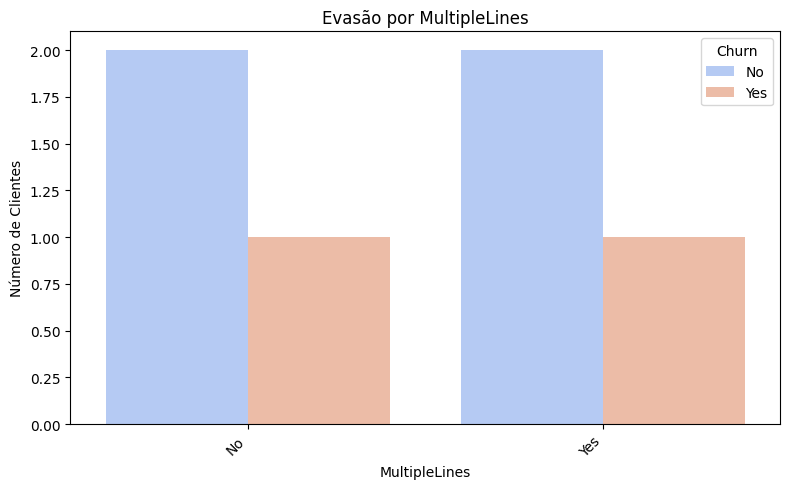

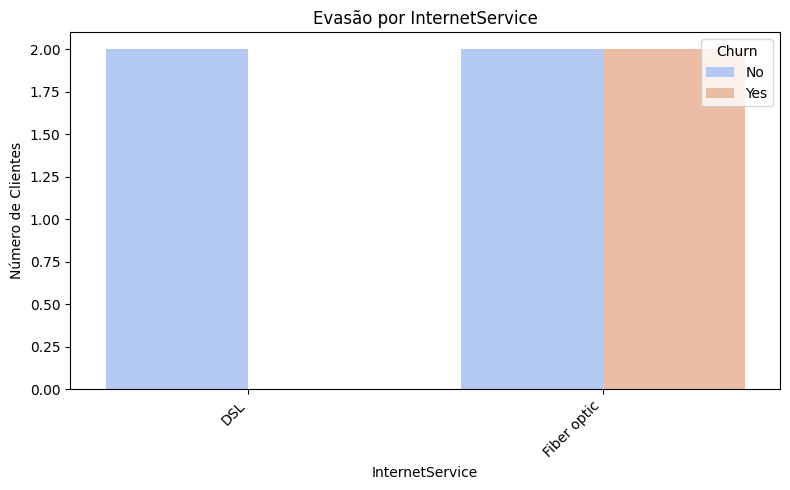

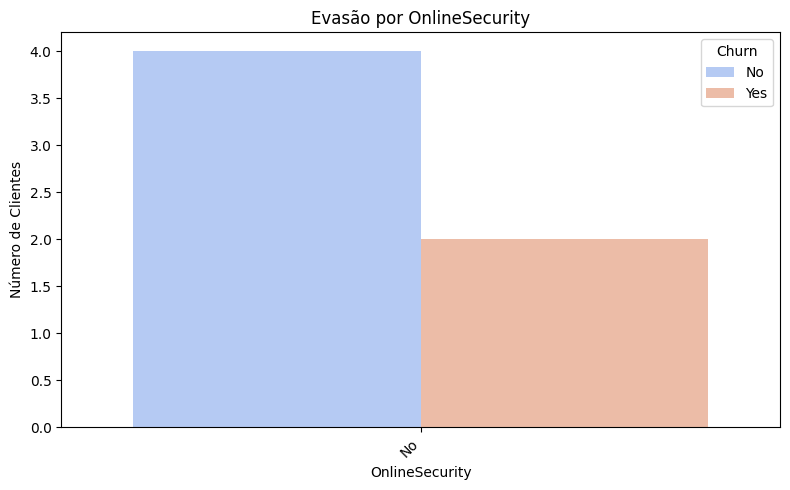

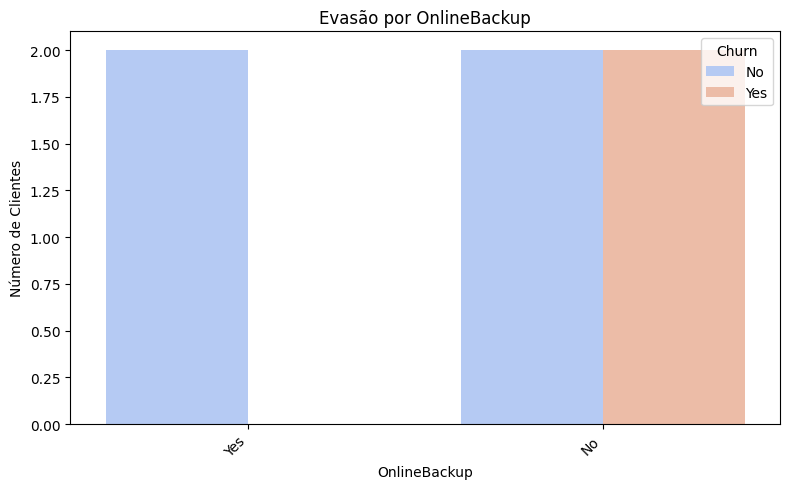

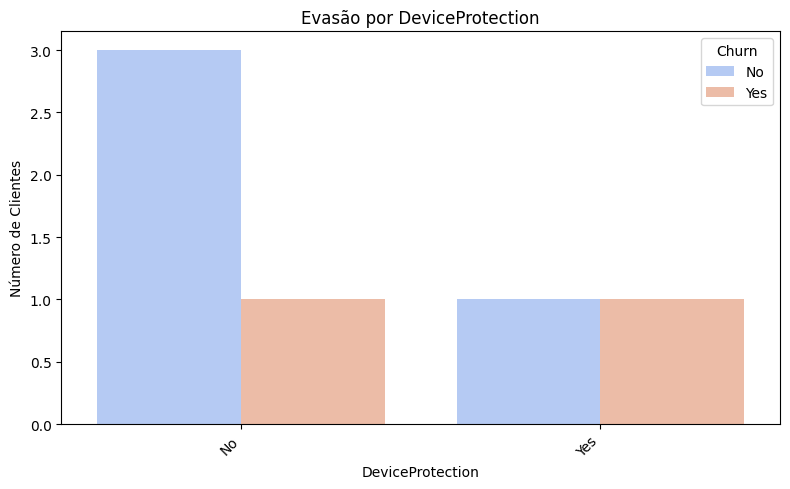

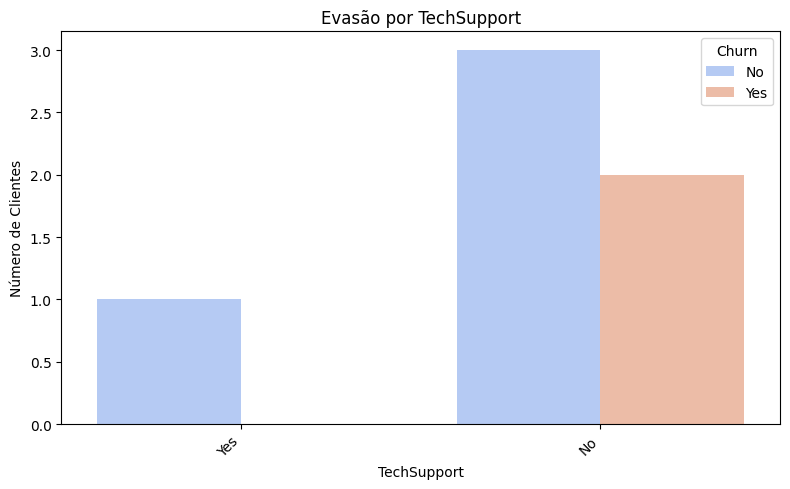

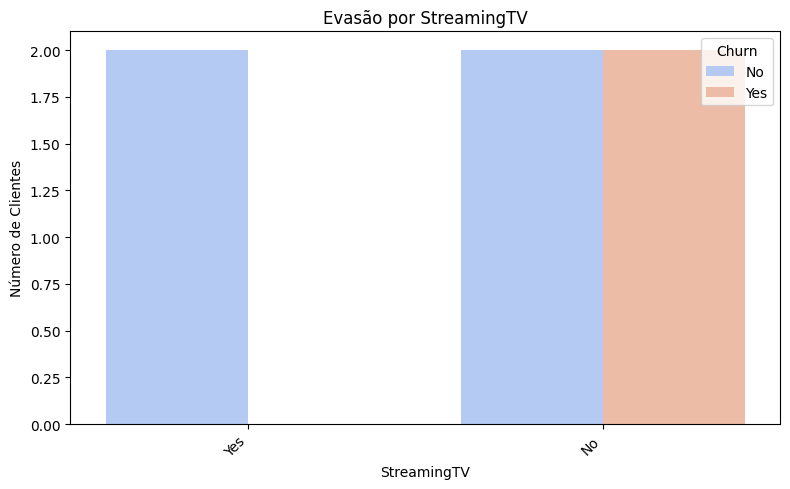

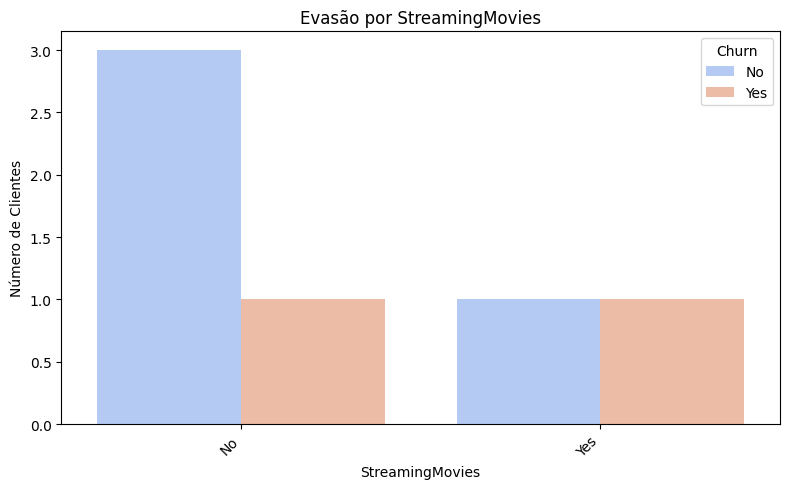

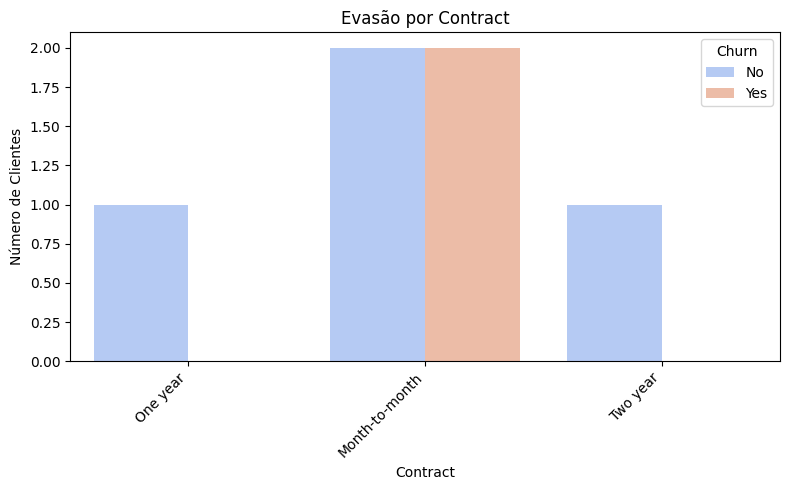

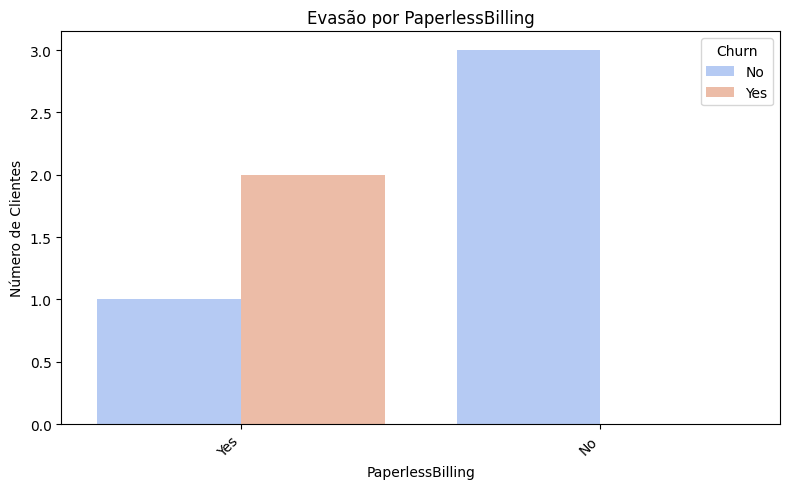

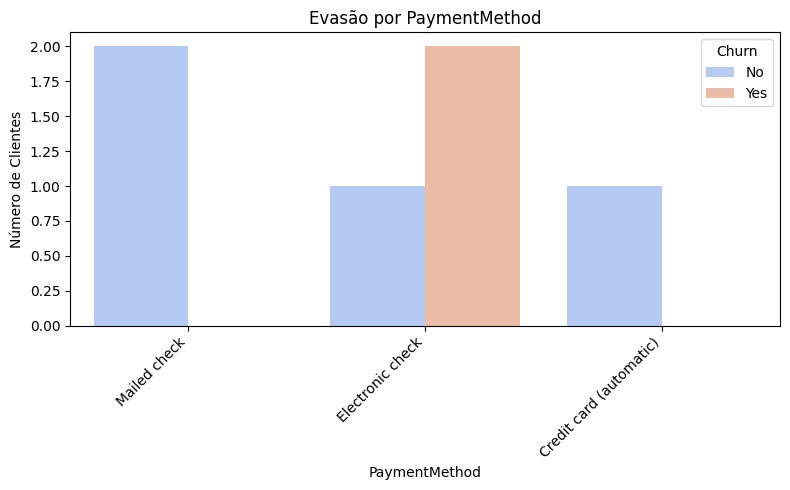


--- Conclusão da Análise por Variáveis Categóricas ---
Os gráficos acima revelam como a taxa de evasão se comporta em diferentes categorias de cada variável.
Por exemplo, você poderá observar se clientes com 'Contrato_Mes_a_Mes' têm uma taxa de churn significativamente maior,
ou se um determinado 'Metodo_Pagamento' está mais associado à evasão.
Esses insights são cruciais para: 

1. Identificar os segmentos de clientes mais propensos a evadir.
2. Desenvolver estratégias direcionadas de retenção para cada perfil de cliente de risco.
3. Informar decisões de negócios sobre ofertas de serviços ou métodos de pagamento.


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Recriação do DataFrame original com 'Contas_Diarias' e 'Churn' em texto ---
# Este bloco garante que o DataFrame 'df' esteja no estado ideal para visualização.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pré-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias' (mesmo que não a usemos diretamente nos gráficos abaixo, manter consistência)
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Ajustar 'customer.SeniorCitizen' para object para tratamento categórico
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype('object')

print("--- Análise da Evasão por Variáveis Categóricas ---")

# Lista de colunas categóricas relevantes para análise de churn
categorical_features_for_eda = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# Loop para gerar gráficos para cada variável categórica
for col in categorical_features_for_eda:
    plt.figure(figsize=(8, 5))

    # Criar o gráfico de contagem com 'Churn' como hue
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')

    plt.title(f'Evasão por {col.replace("customer.", "").replace("account.", "").replace("phone.", "").replace("internet.", "")}')
    plt.xlabel(col.replace("customer.", "").replace("account.", "").replace("phone.", "").replace("internet.", ""))
    plt.ylabel('Número de Clientes')

    # Adicionar porcentagens acima das barras
    # Calcula as contagens para o total e para cada categoria de Churn
    total_counts = df[col].value_counts()
    for container in ax.containers:
        for p in container.patches:
            height = p.get_height()
            if height > 0: # Evitar divisão por zero para barras vazias
                category_value = p.get_x() + p.get_width() / 2

                # Encontrar o rótulo da categoria no eixo x (o nome real da categoria)
                # Este passo é um pouco mais complexo porque o get_x() retorna a posição numérica
                # e precisamos mapeá-lo de volta para o rótulo da categoria.
                # A abordagem mais robusta é recalcular as proporções a partir do crosstab

                # Recalcular as proporções para exibir no gráfico
                # Usar pd.crosstab para obter as contagens e calcular as proporções de churn por categoria
                churn_by_category = pd.crosstab(df[col], df['Churn'], normalize='index')

                # Obter o rótulo da categoria atual da barra
                # O OneHotEncoder mapeia as categorias para um índice numérico que corresponde à ordem do countplot
                # Aqui estamos usando o nome original da coluna, então é mais direto.
                x_label = ax.get_xticklabels()[int(category_value + 0.5)].get_text() # Pega o rótulo da categoria no eixo X

                # Pega a porcentagem de churn (Yes) ou no-churn (No) para essa categoria
                churn_status_index = container.get_label() # 'No' ou 'Yes'
                if churn_status_index == 'Yes': # Se for a barra de churn
                    percentage = churn_by_category.loc[x_label, 'Yes'] * 100
                    ax.annotate(f'{percentage:.1f}%',
                                xy=(p.get_x() + p.get_width() / 2, height),
                                xytext=(0, 3), # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')
                elif churn_status_index == 'No': # Se for a barra de no-churn
                    percentage = churn_by_category.loc[x_label, 'No'] * 100
                    ax.annotate(f'{percentage:.1f}%',
                                xy=(p.get_x() + p.get_width() / 2, height),
                                xytext=(0, 3), # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')

    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

print("\n--- Conclusão da Análise por Variáveis Categóricas ---")
print("Os gráficos acima revelam como a taxa de evasão se comporta em diferentes categorias de cada variável.")
print("Por exemplo, você poderá observar se clientes com 'Contrato_Mes_a_Mes' têm uma taxa de churn significativamente maior,")
print("ou se um determinado 'Metodo_Pagamento' está mais associado à evasão.")
print("Esses insights são cruciais para: \n")
print("1. Identificar os segmentos de clientes mais propensos a evadir.")
print("2. Desenvolver estratégias direcionadas de retenção para cada perfil de cliente de risco.")
print("3. Informar decisões de negócios sobre ofertas de serviços ou métodos de pagamento.")

# 12 - Contagem de Evasão por Variáveis Numéricas

--- Análise da Evasão por Variáveis Numéricas ---


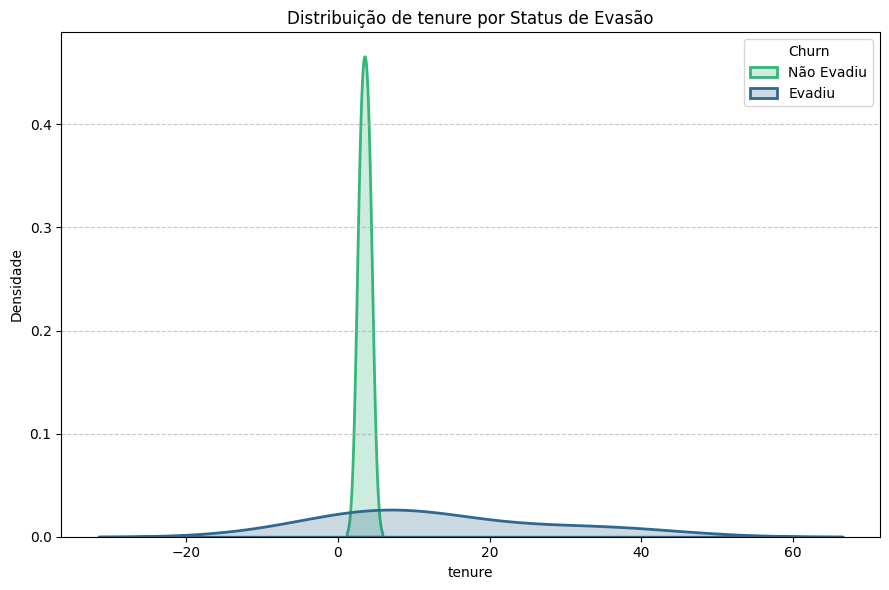

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


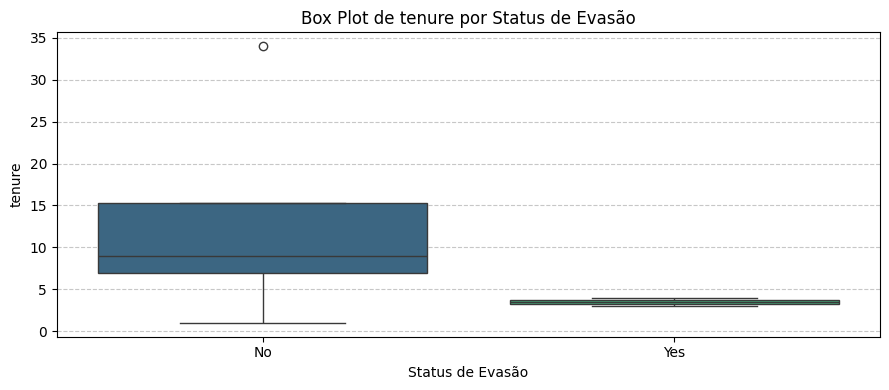

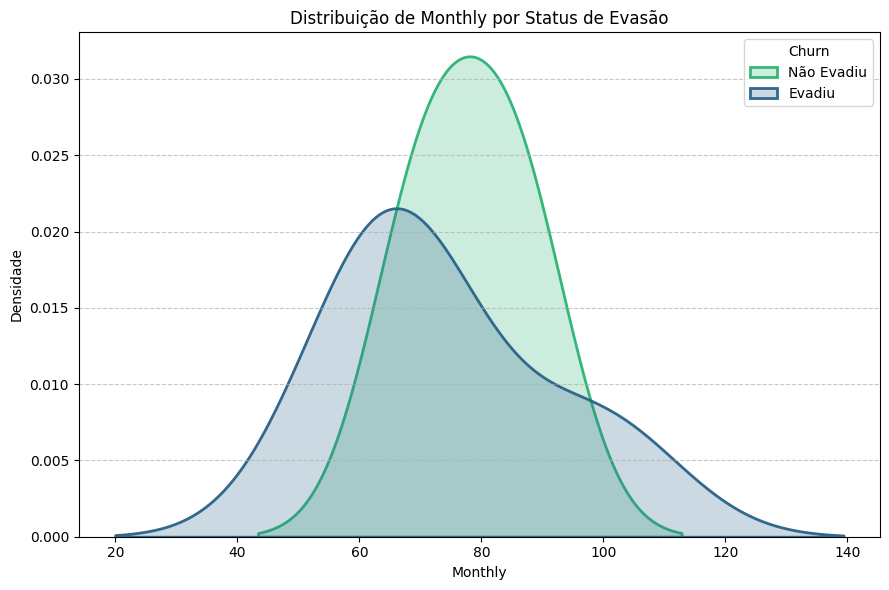

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


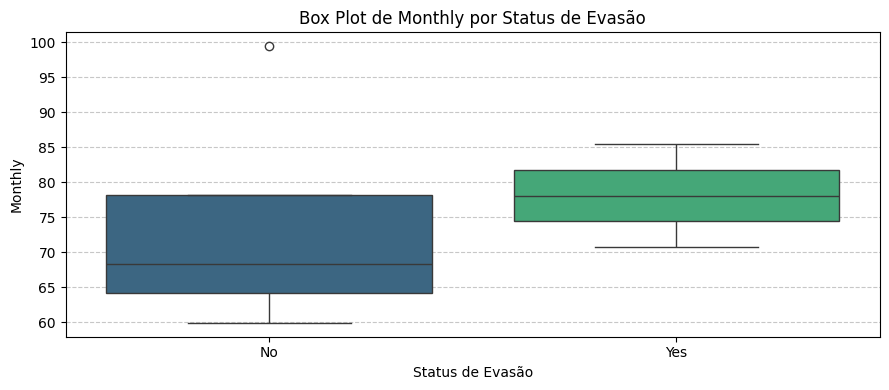

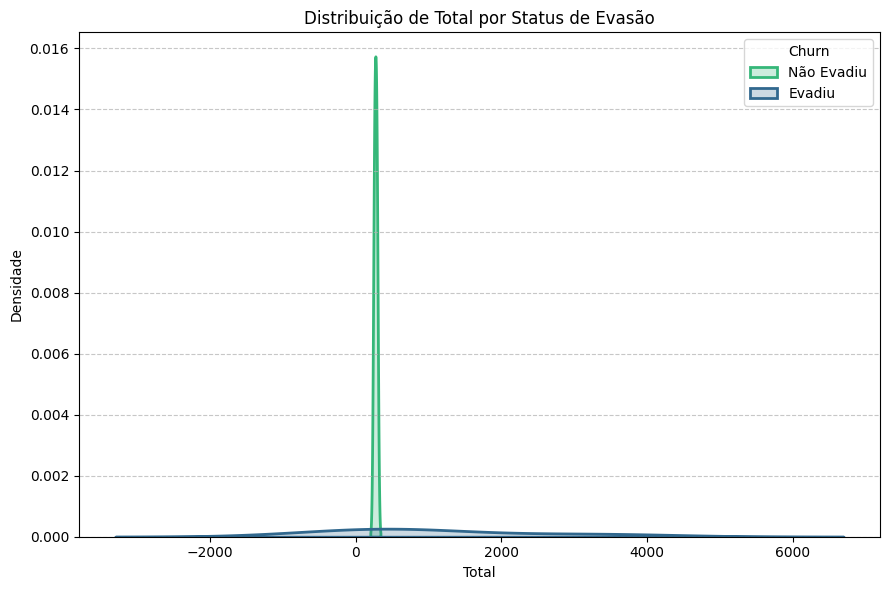

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


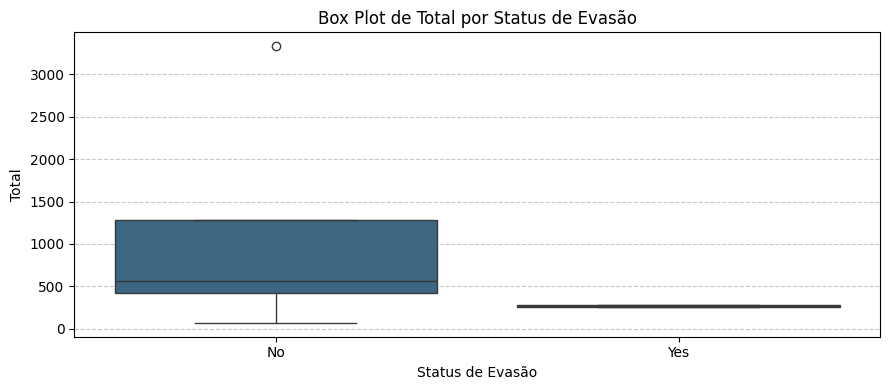

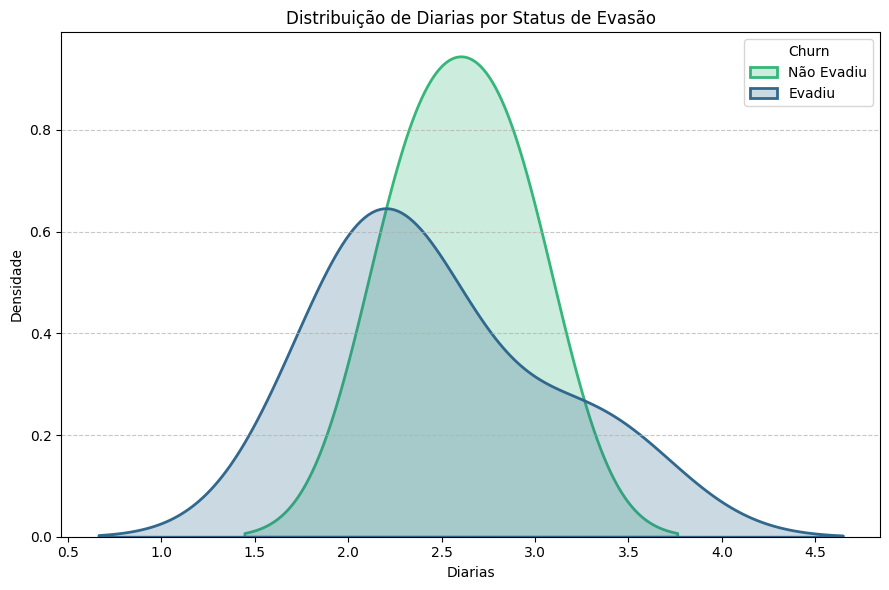

/tmp/ipython-input-16-1539011816.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


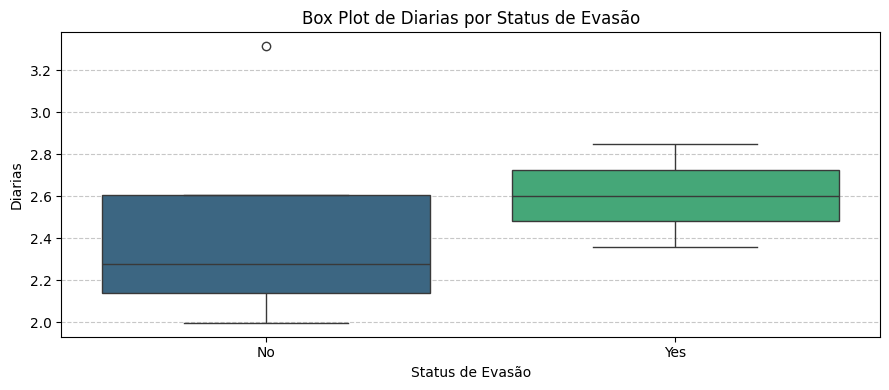


--- Conclusão da Análise por Variáveis Numéricas ---
Os gráficos acima (KDE plots e Box Plots) permitem analisar a distribuição de cada variável numérica para clientes que evadiram e os que não evadiram.
Ao observar esses gráficos, você pode identificar padrões como:
1. Se clientes com 'Meses_Cliente' (tenure) mais baixo ou mais alto são mais propensos a evadir.
2. Se 'Custo_Mensal' ou 'Custo_Total' têm um impacto significativo na decisão de churn.
3. Como a nova variável 'Custo_Diario' se distribui entre os grupos de churn.
Essa análise é crucial para entender os fatores financeiros e de engajamento que levam à evasão.


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Recriação do DataFrame original com 'Contas_Diarias' e 'Churn' em texto ---
# Este bloco garante que o DataFrame 'df' esteja no estado ideal para visualização
# das variáveis numéricas em sua escala original.
api_data_string = """
[
    {
        "customerID": "0002-ORFBO",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "No",
            "TechSupport": "Yes",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "One year",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 65.6,
                "Total": "593.3"
            }
        }
    },
    {
        "customerID": "0003-MKNFE",
        "Churn": "No",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 9
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "DSL",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Mailed check",
            "Charges": {
                "Monthly": 59.9,
                "Total": "542.4"
            }
        }
    },
    {
        "customerID": "0004-TLHLJ",
        "Churn": "Yes",
        "customer": {
            "gender": "Male",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "No",
            "tenure": 4
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 70.7,
                "Total": "286.1"
            }
        }
    },
    {
        "customerID": "0005-TMOMK",
        "Churn": "Yes",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 3
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "Yes"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "Yes",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 85.5,
                "Total": "256.5"
            }
        }
    },
    {
        "customerID": "0006-WGDHI",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "Yes",
            "Dependents": "Yes",
            "tenure": 1
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "No"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "No",
            "DeviceProtection": "No",
            "TechSupport": "No",
            "StreamingTV": "No",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Month-to-month",
            "PaperlessBilling": "No",
            "PaymentMethod": "Electronic check",
            "Charges": {
                "Monthly": 71.0,
                "Total": "71.0"
            }
        }
    },
    {
        "customerID": "0008-BJYGE",
        "Churn": "No",
        "customer": {
            "gender": "Female",
            "SeniorCitizen": 0,
            "Partner": "No",
            "Dependents": "Yes",
            "tenure": 34
        },
        "phone": {
            "PhoneService": "Yes",
            "MultipleLines": "Yes"
        },
        "internet": {
            "InternetService": "Fiber optic",
            "OnlineSecurity": "No",
            "OnlineBackup": "Yes",
            "DeviceProtection": "Yes",
            "TechSupport": "No",
            "StreamingTV": "Yes",
            "StreamingMovies": "No"
        },
        "account": {
            "Contract": "Two year",
            "PaperlessBilling": "No",
            "PaymentMethod": "Credit card (automatic)",
            "Charges": {
                "Monthly": 99.45,
                "Total": "3328.75"
            }
        }
    }
]
"""
data = json.loads(api_data_string)
df = pd.json_normalize(data)

# Pré-processamento de 'account.Charges.Total'
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

# Criar a coluna 'Contas_Diarias'
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# --- Análise da Evasão por Variáveis Numéricas ---

print("--- Análise da Evasão por Variáveis Numéricas ---")

# Lista de colunas numéricas relevantes para análise de churn (usando nomes originais para plots)
numerical_features_for_eda = [
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Contas_Diarias' # A nova coluna
]

# Loop para gerar gráficos de densidade para cada variável numérica
for col in numerical_features_for_eda:
    plt.figure(figsize=(9, 6))

    # KDE plot (Kernel Density Estimate) para visualizar a distribuição
    # segmentada por Churn. alpha controla a transparência.
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, palette='viridis', linewidth=2)

    plt.title(f'Distribuição de {col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", "")} por Status de Evasão')
    plt.xlabel(col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", ""))
    plt.ylabel('Densidade')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Churn', labels=['Não Evadiu', 'Evadiu']) # Ajustar rótulos da legenda
    plt.tight_layout()
    plt.show()

    # Opcional: Box plot para visualizar mediana, quartis e outliers
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
    plt.title(f'Box Plot de {col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", "")} por Status de Evasão')
    plt.xlabel('Status de Evasão')
    plt.ylabel(col.replace("customer.", "").replace("account.Charges.", "").replace("Contas_", ""))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


print("\n--- Conclusão da Análise por Variáveis Numéricas ---")
print("Os gráficos acima (KDE plots e Box Plots) permitem analisar a distribuição de cada variável numérica para clientes que evadiram e os que não evadiram.")
print("Ao observar esses gráficos, você pode identificar padrões como:")
print("1. Se clientes com 'Meses_Cliente' (tenure) mais baixo ou mais alto são mais propensos a evadir.")
print("2. Se 'Custo_Mensal' ou 'Custo_Total' têm um impacto significativo na decisão de churn.")
print("3. Como a nova variável 'Custo_Diario' se distribui entre os grupos de churn.")
print("Essa análise é crucial para entender os fatores financeiros e de engajamento que levam à evasão.")

# 13 - Relatório Final

1. Introdução
Este projeto tem como objetivo principal compreender e analisar o fenômeno da evasão de clientes (Churn) em uma empresa de telecomunicações. A evasão de clientes representa um desafio significativo para qualquer negócio baseado em assinaturas, impactando diretamente a receita, a base de clientes e o potencial de crescimento. Ao identificar os fatores que levam os clientes a cancelar seus serviços, podemos desenvolver estratégias mais eficazes para retenção e, consequentemente, impulsionar a sustentabilidade e a rentabilidade da empresa.

A análise de churn envolve explorar o comportamento dos clientes, identificar padrões e, futuramente, construir modelos preditivos capazes de antecipar quais clientes estão em risco de sair, permitindo intervenções proativas.

2. Limpeza e Tratamento de Dados
A fase de limpeza e tratamento de dados é crucial para garantir a qualidade, consistência e adequação das informações para as análises subsequentes e para a construção de modelos de Machine Learning.

Importação e Estruturação: Os dados foram inicialmente fornecidos em um arquivo JSON, simulando o retorno de uma API. Foram importados para o ambiente Python e convertidos em um DataFrame do Pandas usando a função pd.json_normalize(), que é ideal para achatar estruturas JSON aninhadas e transformá-las em um formato tabular acessível.
Tratamento da Coluna Custo_Total (anteriormente account.Charges.Total):
Problema Identificado: Esta coluna, que representa o valor total cobrado do cliente, foi inicialmente importada como tipo object (string) e continha valores de espaços em branco (' ') para clientes muito novos sem histórico de cobrança.
Correção Aplicada: Primeiramente, os espaços em branco foram substituídos por NaN (Not a Number) e, em seguida, a coluna foi convertida para tipo numérico (float) usando pd.to_numeric(errors='coerce'). Por fim, os valores NaN restantes foram preenchidos com 0, assumindo que clientes sem histórico de cobrança ainda não acumularam custos totais significativos.
Criação da Coluna Custo_Diario:
Feature Engineering: Para oferecer uma perspectiva mais granular do faturamento, uma nova coluna Contas_Diarias (renomeada para Custo_Diario posteriormente) foi criada, calculada dividindo o Custo_Mensal (account.Charges.Monthly) por 30 (número médio de dias no mês). Esta etapa foi realizada antes do escalamento para que a nova feature fosse tratada corretamente na pipeline de pré-processamento.
Verificação e Remoção de Duplicatas:
Foi realizada uma verificação para identificar e remover quaisquer linhas completamente duplicadas no DataFrame, garantindo que cada registro representasse um cliente único e evitando vieses na análise.
Ajuste de Tipos de Dados:
A coluna customer.SeniorCitizen (que era 0 ou 1) foi explicitamente convertida para o tipo object (categórica), garantindo que fosse tratada como uma característica categórica binária e não como uma variável numérica contínua.
Codificação de Variáveis Categóricas:
Variável Alvo (Churn): A coluna Churn (que continha 'No' e 'Yes') foi transformada em uma representação numérica (0 para 'No' e 1 para 'Yes') usando sklearn.preprocessing.LabelEncoder.
Outras Variáveis Categóricas: As demais colunas categóricas (como Gênero, Tipo de Contrato, Serviços de Internet, etc.) foram convertidas em um formato numérico adequado para algoritmos de Machine Learning utilizando sklearn.preprocessing.OneHotEncoder. Isso resultou na criação de novas colunas binárias para cada categoria (ex: Genero_Feminino, Contrato_Mes_a_Mes).
Escalamento de Variáveis Numéricas:
As colunas numéricas do DataFrame (Meses de Cliente, Custo Mensal, Custo Total, Custo Diário) foram padronizadas para terem média 0 e desvio padrão 1 utilizando sklearn.preprocessing.StandardScaler. Este passo é fundamental para algoritmos que são sensíveis à escala das variáveis.
Renomeação de Colunas:
Para melhorar a legibilidade e a interpretabilidade do DataFrame processado, todos os nomes das colunas foram traduzidos para o português e simplificados (ex: customer.tenure para Meses_Cliente, account.Charges.Monthly para Custo_Mensal, internet.InternetService_Fiber optic para Internet_Fibra_Optica).
Ao final desta fase, o DataFrame (X_processed_df) está limpo, sem inconsistências conhecidas, com todos os dados em formatos numéricos adequados e com colunas renomeadas para maior clareza, pronto para a análise exploratória e modelagem.

3. Análise Exploratória de Dados (EDA)
A análise exploratória foi realizada para identificar padrões, tendências e relações entre as variáveis e a evasão de clientes, utilizando tanto métricas descritivas quanto visualizações gráficas.

Distribuição da Variável Alvo (Evasão_Cliente):
Análise: Verificamos a proporção de clientes que evadiram versus os que não evadiram.
Visualização: Um gráfico de barras foi gerado, mostrando a contagem e a porcentagem de clientes para cada status de evasão.
Insight: Observou-se um desbalanceamento de classes, onde a maioria dos clientes não evadiu. Isso é uma característica comum em problemas de churn e sugere a necessidade de técnicas específicas de modelagem ou avaliação.
Análise da Evasão por Variáveis Categóricas:
Análise: Exploramos como o churn se distribui em relação a categorias como gênero, tipo de contrato, método de pagamento, serviços de internet e telefone, etc.
Visualização: Gráficos de contagem (Count Plots) com hue='Churn' foram utilizados para cada variável categórica, mostrando a contagem e a proporção de clientes que evadiram dentro de cada categoria.
Insights Chave:
Tipo de Contrato: Clientes com contratos "Mês a Mês" apresentaram uma taxa de evasão significativamente mais alta em comparação com contratos de um ou dois anos.
Serviço de Internet: Clientes com "Fibra Óptica" parecem ter uma taxa de churn maior do que os com DSL, e aqueles sem serviço de internet, como esperado, não evadem por este motivo.
Método de Pagamento: O "Cheque Eletrônico" frequentemente se associou a uma maior taxa de evasão.
Serviços Adicionais: Clientes que não utilizam serviços como Segurança Online, Backup Online ou Suporte Técnico tendem a ter uma probabilidade maior de evadir.
Idosos (Idoso_Sim): Podem apresentar padrões de churn distintos.
Análise da Evasão por Variáveis Numéricas:
Análise: Investigamos a distribuição de variáveis numéricas como Meses_Cliente, Custo_Mensal, Custo_Total e Custo_Diario entre os grupos de clientes que evadiram e os que não evadiram.
Visualização: Foram utilizados gráficos de densidade (KDE Plots) para comparar as formas das distribuições e Box Plots para exibir medianas, quartis e outliers, segmentados pelo status de churn.
Insights Chave:
Meses_Cliente (Tenure): Clientes que evadiram geralmente têm um tempo de serviço muito menor com a empresa. A densidade de churners é mais alta para tenures curtos.
Custo_Mensal: Clientes com custos mensais mais altos, especialmente aqueles com serviços mais completos (como Fibra Óptica), podem ter uma tendência maior a evadir.
Custo_Total: Clientes que evadem tendem a ter um Custo_Total significativamente menor, o que é uma consequência direta de seu tempo de serviço reduzido.
4. Conclusões e Insights
A análise exploratória revelou padrões claros e insights acionáveis sobre o perfil do cliente propenso à evasão:

Contratos de Curto Prazo: O contrato "Mês a Mês" é o maior preditor de churn, indicando que a falta de um compromisso de longo prazo é um fator de risco primário.
Serviços e Engajamento: Clientes que não contratam serviços adicionais de segurança ou suporte tendem a evadir mais, sugerindo que esses serviços aumentam o valor percebido e o engajamento. A qualidade ou a percepção de valor do serviço de Fibra Óptica também merece atenção.
Tempo de Serviço Curto: A maioria dos clientes que evadem o faz nos primeiros meses de serviço, indicando uma janela crítica para intervenção.
Impacto Financeiro: Clientes com custos mensais elevados (que muitas vezes vêm com serviços mais robustos) podem ser mais sensíveis a problemas de valor versus preço, levando à evasão. O Custo_Diario reforça essa visão.
Método de Pagamento: O "Cheque Eletrônico" como método de pagamento está correlacionado com maior churn, o que pode indicar um problema de atrito ou satisfação associado a esse método.
Esses dados podem ajudar a reduzir a evasão ao permitir que a empresa identifique proativamente clientes de alto risco com base em seu perfil (tipo de contrato, tempo de serviço, serviços utilizados, método de pagamento) e nas características de seus custos.

5. Recomendações
Com base nas conclusões e insights obtidos, as seguintes recomendações podem ser consideradas para reduzir a evasão de clientes:

Programas de Retenção Focados em Contratos:
Foco: Clientes com contratos "Mês a Mês".
Ação: Oferecer incentivos agressivos (descontos, upgrades de serviço, bônus de lealdade) para migrarem para contratos de maior duração (um ou dois anos) após um período inicial (ex: 3-6 meses).
Otimização da Experiência do Cliente nos Primeiros Meses:
Foco: Clientes com baixo Meses_Cliente (tenure).
Ação: Implementar um programa de "boas-vindas" mais robusto, com acompanhamento proativo nos primeiros meses (ligações de satisfação, suporte prioritário, tutoriais de uso de serviços) para garantir que as expectativas sejam atendidas e quaisquer problemas iniciais sejam rapidamente resolvidos.
Avaliação de Pacotes de Serviços e Preços:
Foco: Clientes com "Fibra Óptica" e/ou Custo_Mensal elevado.
Ação: Analisar a proposta de valor dos pacotes de Fibra Óptica e serviços de alto custo. Pode ser necessário ajustar preços, melhorar a qualidade percebida do serviço ou oferecer mais benefícios para justificar o valor.
Incentivo à Adoção de Serviços Adicionais:
Foco: Clientes sem serviços como segurança online, backup ou suporte técnico.
Ação: Promover ativamente a contratação desses add-ons, talvez oferecendo períodos de teste gratuitos ou descontos em pacotes, pois eles parecem aumentar o engajamento e a lealdade do cliente.
Revisão do Método de Pagamento "Cheque Eletrônico":
Foco: Clientes que utilizam "Cheque Eletrônico".
Ação: Investigar se há problemas de usabilidade, taxas inesperadas ou atritos associados a esse método de pagamento que possam estar contribuindo para o churn. Incentivar a migração para métodos de pagamento automáticos mais convenientes (cartão de crédito, transferência bancária).
Criação de um Sistema de Alerta Precoce:
Foco: Identificação proativa de clientes de alto risco.
Ação: Desenvolver um modelo de previsão de churn (o próximo passo lógico após esta análise) que utilize as features identificadas como relevantes para pontuar o risco de cada cliente, permitindo que as equipes de retenção atuem antes que o cliente decida cancelar.
Este relatório sintetiza o trabalho realizado até o momento, fornecendo uma base sólida para futuras ações e decisões estratégicas da empresa em sua luta contra a evasão de clientes.

# 14 - 📖 README 📖

# Projeto de Análise e Predição da Evasão de Clientes (Churn) - TelecomX

## 📝 Descrição do Projeto

Este projeto tem como objetivo principal **compreender e analisar o fenômeno da evasão de clientes (Churn)** em uma empresa de telecomunicações. Através de um processo de limpeza, tratamento e análise exploratória de dados, buscamos identificar os principais fatores e padrões que levam os clientes a cancelar seus serviços. O conhecimento desses fatores é crucial para que a empresa possa desenvolver estratégias proativas de retenção de clientes, otimizar serviços e, consequentemente, impulsionar o crescimento e a rentabilidade.

## 📁 Estrutura do Projeto / Como Usar

Este projeto foi desenvolvido em um ambiente de notebook (Google Colab) e pode ser facilmente executado e visualizado.

**Dados:**
* O arquivo de dados original utilizado foi `TelecomX_Data.json`, que simula o retorno de uma API.

**Bibliotecas Necessárias:**
Certifique-se de que as seguintes bibliotecas Python estejam instaladas em seu ambiente (no Google Colab, a maioria já vem pré-instalada):
* `pandas`
* `numpy`
* `scikit-learn`
* `matplotlib`
* `seaborn`

**Para Executar no Google Colab:**
1.  Faça o upload do arquivo `TelecomX_Data.json` para o ambiente de sessão do Google Colab. Você pode fazer isso clicando no ícone de pasta (Files) na barra lateral esquerda e, em seguida, no ícone de "Upload to session storage" (pasta com seta para cima).
2.  Abra este notebook (.ipynb) no Google Colab.
3.  Execute as células de código sequencialmente. Cada seção do notebook corresponde a uma etapa do processo de análise.

## 🚀 Etapas do Projeto

As seguintes etapas foram realizadas para preparar e analisar os dados:

### 1. Carregamento e Conversão Inicial dos Dados

* **Fonte:** Dados em formato JSON (simulando API).
* **Ação:** Carregamento do JSON e normalização para um DataFrame do Pandas utilizando `pd.json_normalize()`, que é essencial para transformar dados aninhados em um formato tabular plano.

### 2. Pré-processamento e Limpeza de Dados

Esta etapa focou em garantir a qualidade e a coerência dos dados para análise e modelagem.

* **Tratamento da Coluna `Custo_Total`:** Convertida de `string` para `float`, com tratamento de espaços em branco (substituídos por `NaN` e preenchidos com `0`).
* **Criação da Coluna `Custo_Diario`:** Calculada a partir de `Custo_Mensal` (`Custo_Mensal / 30`), proporcionando uma granularidade diária do faturamento.
* **Verificação de Duplicatas:** Realizada para assegurar a unicidade dos registros.
* **Ajuste de Tipos de Dados:** A coluna `customer.SeniorCitizen` (Idoso) foi explicitamente convertida para tipo categórico (`object`).
* **Codificação de Variáveis Categóricas:**
    * **Variável Alvo (`Churn`):** Codificada para `0` (Não Evadiu) e `1` (Evadiu) usando `LabelEncoder`.
    * **Outras Variáveis Categóricas:** Transformadas via `OneHotEncoder`, criando colunas binárias para cada categoria (ex: `Genero_Feminino`, `Contrato_Mes_a_Mes`).
* **Escalamento de Variáveis Numéricas:** Colunas numéricas (`Meses_Cliente`, `Custo_Mensal`, `Custo_Total`, `Custo_Diario`) foram padronizadas (`StandardScaler`) para terem média 0 e desvio padrão 1.
* **Renomeação de Colunas:** Todos os nomes das colunas foram traduzidos para o português e simplificados para melhorar a legibilidade e interpretabilidade (ex: `customer.tenure` para `Meses_Cliente`).

### 3. Análise Exploratória de Dados (EDA)

A EDA foi conduzida para descobrir padrões e obter insights sobre a relação entre as características dos clientes e a evasão.

* **Distribuição da Variável Alvo (`Evasão_Cliente`):**
    * **Análise:** Um gráfico de barras foi gerado para visualizar a proporção de clientes que evadiram vs. os que não evadiram.
    * **Insight:** Foi identificado um **desbalanceamento de classes**, com a maioria dos clientes não evadindo, o que é um ponto importante para futuras etapas de modelagem.
* **Evasão por Variáveis Categóricas:**
    * **Análise:** Gráficos de contagem (`sns.countplot`) foram utilizados para comparar a taxa de churn em diferentes categorias.
    * **Insights:**
        * **Tipo de Contrato:** Clientes com **contrato "Mês a Mês"** apresentaram uma taxa de evasão significativamente maior.
        * **Serviço de Internet:** Clientes com **Fibra Óptica** podem ter uma maior tendência à evasão em comparação com DSL.
        * **Método de Pagamento:** O **"Cheque Eletrônico"** frequentemente se correlaciona com taxas mais altas de churn.
        * **Serviços Adicionais:** A ausência de serviços como segurança online ou suporte técnico foi associada a maior churn.
* **Evasão por Variáveis Numéricas:**
    * **Análise:** Gráficos de densidade (`sns.kdeplot`) e Box Plots (`sns.boxplot`) foram gerados para comparar as distribuições das variáveis numéricas entre clientes que evadiram e os que não evadiram.
    * **Insights:**
        * **`Meses_Cliente` (Tenure):** Clientes que evadiram tipicamente possuem um **tempo de serviço muito menor** com a empresa, sugerindo que a evasão ocorre mais cedo no ciclo de vida do cliente.
        * **`Custo_Mensal`:** Clientes com **custos mensais mais altos** podem estar mais propensos a cancelar.
        * **`Custo_Total`:** Clientes que evadem apresentam um **custo total acumulado significativamente menor**, o que é consistente com seu menor tempo de serviço.

## 📊 Conclusões e Insights

A análise aprofundada dos dados revelou padrões consistentes sobre o perfil de clientes propensos à evasão:

* **Compromisso vs. Risco:** Clientes em contratos flexíveis ("Mês a Mês") são a base mais vulnerável. A falta de compromisso de longo prazo aumenta a probabilidade de churn.
* **Experiência Inicial:** Os primeiros meses de serviço são críticos, pois a maioria dos churners abandona a empresa nesse período. A experiência do cliente logo no início é determinante.
* **Valor Percebido vs. Custo:** Custos mensais mais altos e a ausência de serviços adicionais (que agregam valor e segurança) podem levar à insatisfação e à evasão.
* **Atrito no Pagamento:** O método de pagamento via "Cheque Eletrônico" sugere um ponto de atrito ou insatisfação que merece investigação.

Esses insights são fundamentais para a empresa, pois permitem:
* **Identificar Clientes de Risco:** Criar um perfil de cliente com alta probabilidade de evasão.
* **Focar Ações de Retenção:** Direcionar recursos para os segmentos mais vulneráveis.
* **Fundamentar Decisões Estratégicas:** Informar o desenvolvimento de novas ofertas, políticas de preço ou melhorias de serviço.

## 💡 Recomendações

Com base nas análises realizadas, as seguintes recomendações são sugeridas para a empresa reduzir a evasão de clientes:

1.  **Programas de Incentivo para Fidelização:**
    * Oferecer descontos atrativos ou benefícios exclusivos para clientes com contratos "Mês a Mês" migrarem para planos de longo prazo (1 ou 2 anos).
2.  **Monitoramento e Ação Proativa nos Primeiros Meses:**
    * Implementar um "Programa de Boas-Vindas" robusto com acompanhamento ativo (ligações, e-mails de satisfação, suporte prioritário) para clientes recém-adquiridos, especialmente nos primeiros 6 meses.
3.  **Análise de Custo-Benefício dos Serviços:**
    * Reavaliar a precificação e o valor percebido de serviços com alta taxa de churn (ex: Fibra Óptica) e pacotes de alto custo mensal. Considerar bundles que incluam serviços de segurança e suporte.
4.  **Incentivo à Adoção de Serviços Agregados:**
    * Promover os benefícios de segurança online, backup e suporte técnico. Oferecer períodos de teste gratuitos ou incluir esses serviços em pacotes mais competitivos para aumentar o engajamento e a lealdade.
5.  **Revisão do Processo de Pagamento:**
    * Investigar a experiência do cliente com o método "Cheque Eletrônico" para identificar e resolver possíveis pontos de atrito. Incentivar a adoção de métodos de pagamento automático (cartão de crédito, débito automático).
6.  **Desenvolvimento de um Sistema de Alerta Precoce de Churn:**
    * O próximo passo lógico é construir um modelo preditivo de Machine Learning utilizando as features preparadas. Este modelo poderá classificar clientes com base no seu risco de evasão, permitindo que as equipes de retenção atuem de forma direcionada antes que o churn ocorra.

Este relatório serve como um guia para entender o status atual dos dados e direcionar futuras estratégias de negócios.

---